## Unit Economics y Cohorts


## Economía Unitaria (Unit Economics)

**Objetivo de esta Sección:**
Introducir y profundizar en el concepto de Unit Economics, destacando su importancia en la toma de decisiones empresariales y la planificación estratégica.

### ¿Qué son los Unit Economics?

Los **unit economics** se refieren a los ingresos y costos asociados a un modelo de negocio específico, expresados por unidad de producto o servicio. Este análisis permite a las empresas entender profundamente la rentabilidad de cada unidad vendida o cada cliente servido, lo cual es esencial para evaluar la viabilidad y escalabilidad del negocio.

### Métricas Clave en Economía Unitaria

1. **Costo de Adquisición de Clientes (CAC)**
    - **Definición**: El CAC es el costo total asociado a la adquisición de un nuevo cliente. Incluye todas las actividades de marketing y ventas divididas por el número de clientes adquiridos.
    - **Fórmula**: 
     $
     CAC = \frac{\text{Gastos Totales en Marketing y Ventas}}{\text{Número de Clientes Adquiridos}}
     $
    - **¿Importancia?**

2. **Valor de Vida del Cliente (LTV)**
    - **Definición**: El LTV representa el ingreso total que se espera generar de un cliente a lo largo de su relación con la empresa.
    - **Fórmula**: 
     $
     LTV = \frac{\text{ARPU} \times \text{Margen Bruto}}{\text{Tasa de Cancelación}}
     $
    - Donde **ARPU** es el ingreso promedio por usuario y la **tasa de cancelación** es el porcentaje de clientes que dejan de serlo cada periodo.
    - **¿Importancia?**

3. **Margen Bruto**
    - **Definición**: El margen bruto indica la rentabilidad de los productos o servicios después de cubrir los costos directos asociados con la producción y venta.
    - **Fórmula**: 
     $
     \text{Margen Bruto} = \frac{\text{Ingresos Totales} - \text{Costos de Bienes Vendidos}}{\text{Ingresos Totales}}
     $
    - **¿Importancia?**

### Importancia de los Unit Economics

Entender las economías unitarias es crucial para cualquier negocio, especialmente para startups y empresas en crecimiento que necesitan validar la sostenibilidad de su modelo de negocio. Estas métricas ayudan a los líderes empresariales a tomar decisiones informadas sobre dónde invertir recursos, cómo optimizar estrategias de marketing, y cuándo ajustar precios o costos para mejorar la rentabilidad general.


## Comprendiendo las Cohortes (Cohorts)

### Definición de Cohortes
Una cohorte en análisis de negocios agrupa individuos, clientes o usuarios que comparten características comunes dentro de un período de tiempo definido. Esta agrupación permite a las empresas analizar y comparar cambios y respuestas a lo largo del tiempo en un contexto estructurado.

- Ejemplo Práctico: En un entorno de comercio electrónico, un cohort puede ser definido por los clientes que se inscribieron en un mismo mes. Esto ayuda a la empresa a observar cómo estos grupos específicos de clientes evolucionan en términos de comportamiento de compra y retención, mes a mes.

### Aplicación del Análisis de Cohorts
El análisis de cohortes es una herramienta poderosa para:

- Seguimiento de Comportamiento: Identificar patrones de comportamiento a lo largo del tiempo, como la frecuencia de compra o la tasa de retención.

- Evaluación de Cambios: Medir el impacto de cambios específicos o eventos, como una nueva campaña de marketing o cambios en la política de precios.

- Optimización de Estrategias: Ajustar estrategias de marketing y operaciones basadas en el comportamiento y las respuestas de cada cohort.

- Ejemplo de Aplicación: Utilizando los datos de compra y registros, las empresas pueden identificar qué cohorts están gastando más, tienen una tasa de retención más alta o responden mejor a ciertas campañas de marketing.

### Beneficios del Análisis de Cohortes
El análisis de cohortes ofrece ventajas significativas en el análisis de datos, incluyendo:

- Mayor Precisión en Predicciones: Al analizar grupos que experimentaron sus respectivos ciclos de compra de manera similar, las predicciones sobre su comportamiento futuro son generalmente más precisas.
- Insights Profundos sobre Rendimiento de Producto: Entender cómo diferentes grupos responden a productos o servicios puede revelar qué aspectos están funcionando bien o qué necesita mejorarse.
- Mejora en la Retención de Clientes: Al identificar y analizar las razones detrás de las tasas de churn en diferentes cohortes, las empresas pueden implementar estrategias más efectivas de retención.

### Preguntas

1. ¿Cómo podría una empresa de comercio electrónico utilizar el análisis de cohorts para mejorar la retención de clientes?
    - Reflexione sobre cómo el análisis de la actividad del cliente desde su fecha de registro puede ayudar a identificar patrones de abandono.

2. ¿De qué manera el análisis de cohortes puede ayudar a una startup a medir el impacto de cambios en el producto sobre la satisfacción del cliente?
    - Considere cómo agrupar a los usuarios según las versiones del producto que han utilizado podría revelar insights sobre las características que aumentan la retención o satisfacción.

3. ¿Cuáles métricas específicas se deberían analizar en un análisis de cohortes para un servicio de suscripción mensual?
    - Piense en métricas como tasa de renovación, valor promedio de renovación y tiempo hasta la cancelación.

4. ¿Cómo podría una empresa ajustar sus estrategias de marketing basándose en los resultados de un análisis de cohortes?
    - Discuta cómo los datos de comportamiento de compra y respuesta a campañas previas pueden influir en futuras decisiones de marketing y personalización de ofertas.

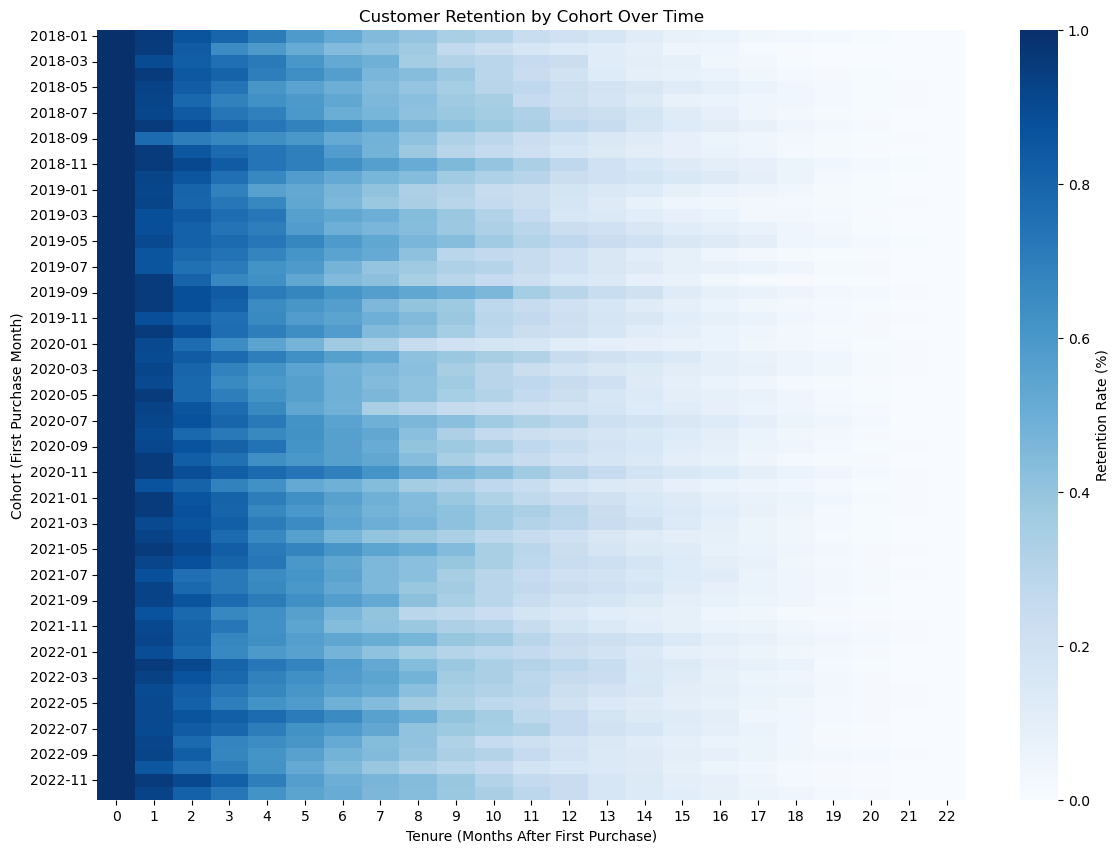

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define time period (5 years, monthly data)
dates = pd.date_range(start='2018-01-01', periods=60, freq='MS')

# Simulate 2000 unique customers with varying start dates
customer_ids = np.arange(1000, 3000)
start_dates = np.random.choice(dates, size=len(customer_ids), replace=True)
start_dates.sort()

# Create DataFrame of customers and their first purchase dates
customers = pd.DataFrame({'customer_id': customer_ids, 'start_date': start_dates})
customers['cohort'] = customers['start_date'].dt.to_period('M')

# Generate monthly data for each customer simulating retention over time
records = []
for _, row in customers.iterrows():
    periods = np.random.randint(1, 24)  # Customers stay for 1 to 24 months
    dates = pd.date_range(start=row['start_date'], periods=periods, freq='M')
    records.extend([(row['customer_id'], date) for date in dates])

# Create a DataFrame for all records
df = pd.DataFrame(records, columns=['customer_id', 'date'])
df['order_month'] = df['date'].dt.to_period('M')

# Calculate cohorts and period numbers
df['cohort'] = df.groupby('customer_id')['date'].transform('min').dt.to_period('M')
df['period_number'] = (df['order_month'] - df['cohort']).apply(lambda x: x.n)

# Calculate number of customers in each cohort per period
cohort_data = df.groupby(['cohort', 'period_number']).agg(n_customers=('customer_id', 'nunique')).reset_index()
cohort_pivot = cohort_data.pivot(index='cohort', columns='period_number', values='n_customers').fillna(0)

# Calculate retention rate
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0)

# Create a decreasing trend in retention by applying a decay factor
decay = retention.columns / retention.columns.max()
retention *= np.tile(1 - decay, (retention.shape[0], 1))

# Plotting the retention matrix
plt.figure(figsize=(14, 10))
ax = sns.heatmap(retention, annot=False, fmt='.0%', cmap='Blues', cbar=True, cbar_kws={'label': 'Retention Rate (%)'})
ax.set_title('Customer Retention by Cohort Over Time')
ax.set_ylabel('Cohort (First Purchase Month)')
ax.set_xlabel('Tenure (Months After First Purchase)')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


In [4]:
retention.head()

period_number,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
cohort,,,,,,,,,,,,,,,,,,,,,
2018-01,1.0,0.954545,0.861244,0.795455,0.710526,0.589713,0.516746,0.448565,0.401914,0.342105,...,0.161483,0.114833,0.075359,0.064593,0.041866,0.033493,0.021531,0.009569,0.003589,0.0
2018-02,1.0,0.954545,0.833333,0.647727,0.590909,0.515152,0.444444,0.416667,0.371212,0.262626,...,0.113636,0.090909,0.053030,0.045455,0.018939,0.005051,0.003788,0.000000,0.000000,0.0
2018-03,1.0,0.894886,0.823864,0.755682,0.715909,0.603693,0.522727,0.490057,0.357955,0.313920,...,0.115057,0.102273,0.089489,0.042614,0.028409,0.011364,0.000000,0.000000,0.000000,0.0
2018-04,1.0,0.954545,0.844156,0.801948,0.701299,0.634740,0.571429,0.462662,0.431818,0.379870,...,0.131494,0.090909,0.079545,0.068182,0.040584,0.025974,0.014610,0.009740,0.001623,0.0
2018-05,1.0,0.927273,0.831169,0.740260,0.607792,0.551948,0.498701,0.448052,0.400000,0.354545,...,0.187013,0.155844,0.118182,0.093506,0.064935,0.036364,0.023377,0.010390,0.005195,0.0


## Actividad en clase
1. Formación de Grupos:
    - Organízate en grupos de 3 a 4 personas.
    - Cada grupo representará la junta directiva de una startup ficticia dentro de un sector asignado (e.g., tecnología, salud, comercio electrónico).

2. Revisión de Datos:
    - Cada grupo recibirá un conjunto de datos básicos que incluyen gastos de marketing, ventas y datos de clientes.

3. Cálculo de Métricas:
    - Utilizando los datos proporcionados, calcula el Costo de Adquisición de Clientes (CAC) y el Valor de Vida de los clientes (LTV) para tu startup por cliente y por cohort. ¿Cual es el cliente con mayor LTV? ¿Cual es el cohort con mayor LTV?

4. Desarrollo de Estrategias:
    - Basado en tus cálculos, discute dentro de tu grupo estrategias que podrían implementarse para mejorar el CAC y aumentar el LTV.

In [5]:
import pandas as pd

cx_id=pd.read_csv("customer_ids.csv")
mkt_exp=pd.read_csv("marketing_expenses.csv")
purchases=pd.read_csv("purchases.csv")


In [8]:
merged_df = pd.merge(cx_id, purchases, on='customer_id', how='outer')


In [9]:
new_df = merged_df.groupby('join_date')['customer_id'].nunique().reset_index(name='customer_count')
new_df.rename(columns={'join_date': 'month'}, inplace=True)

In [10]:
cac = pd.merge(new_df, mkt_exp, on='month', how='outer')
cac["CAC"]=cac["marketing_expense"]/cac["customer_count"]
cac

,month,customer_count,marketing_expense,CAC
0,2018-01,8,2046.184675,255.773084
1,2018-02,13,3748.778170,288.367552
2,2018-03,11,2759.304618,250.845874
3,2018-04,7,3350.762738,478.680391
4,2018-05,5,4872.743045,974.548609
5,2018-06,7,3197.105953,456.729422
6,2018-07,9,4519.404820,502.156091
7,2018-08,10,2565.621817,256.562182
8,2018-09,9,4017.381494,446.375722
9,2018-10,1,4931.020863,4931.020863


In [11]:
cac_cohort_df = cac[['month', 'CAC']]
cac_cohort_df.head(2) 

,month,CAC
0,2018-01,255.773084
1,2018-02,288.367552


In [21]:
ltv = pd.merge(cx_id, purchases, on='customer_id', how='outer')
ltv=ltv.rename(columns={'join_date': 'month'})
ltv_cohort_df=ltv[['month', 'purchase_amount']]
cohort=pd.merge(cac_cohort_df, ltv_cohort_df, on='month', how='outer')
cohort=cohort.rename(columns={'purchase_amount': 'LTV'})
cohort=cohort.rename(columns={'month': 'COHORT'})
cohort.head(2)

,COHORT,CAC,LTV
0,2018-01,255.773084,426.977425
1,2018-01,255.773084,236.726941


In [26]:
cohort["LTV/CAC"]=cohort["LTV"]/cohort["CAC"]
cohort

,COHORT,CAC,LTV,LTV/CAC
0,2018-01,255.773084,426.977425,1.669360
1,2018-01,255.773084,236.726941,0.925535
2,2018-01,255.773084,321.671201,1.257643
3,2018-01,255.773084,360.568155,1.409719
4,2018-01,255.773084,431.896721,1.688593
...,...,...,...,...
1539,2020-12,273.447361,208.438502,0.762262
1540,2020-12,273.447361,339.067313,1.239973
1541,2020-12,273.447361,446.438253,1.632630
1542,2020-12,273.447361,478.693492,1.750587


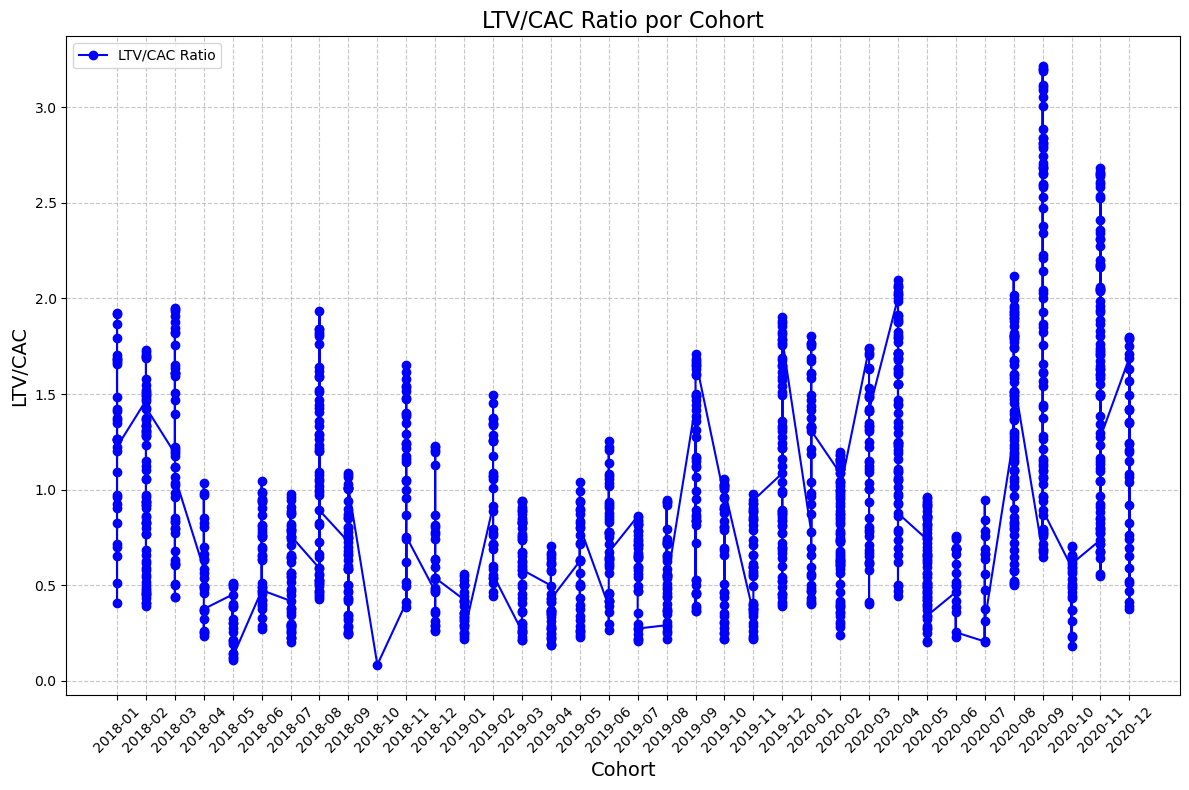

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.plot(cohort['COHORT'], cohort['LTV/CAC'], marker='o', linestyle='-', color='b', label='LTV/CAC Ratio')
plt.title('LTV/CAC Ratio por Cohort', fontsize=16)
plt.xlabel('Cohort', fontsize=14)
plt.ylabel('LTV/CAC', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
new=cx_id.groupby("join_date").count()
new

,customer_id
join_date,
2018-01,8
2018-02,13
2018-03,11
2018-04,7
2018-05,5
2018-06,7
2018-07,9
2018-08,10
2018-09,9


In [8]:
mkt_exp["join_date"]=mkt_exp["month"]
mkt_exp

,month,marketing_expense,join_date
0,2018-01,2046.184675,2018-01
1,2018-02,3748.778170,2018-02
2,2018-03,2759.304618,2018-03
3,2018-04,3350.762738,2018-04
4,2018-05,4872.743045,2018-05
5,2018-06,3197.105953,2018-06
6,2018-07,4519.404820,2018-07
7,2018-08,2565.621817,2018-08
8,2018-09,4017.381494,2018-09
9,2018-10,4931.020863,2018-10


In [10]:
purchases.groupby("customer_id")["purchase_amount"].sum().mean()


1560.4785237955402

In [11]:
cx_purchases=purchases.merge(cx_id, on="customer_id", how="inner")

In [12]:
cohorts_and_cx_ltv=cx_purchases.groupby(["join_date","customer_id"])["purchase_amount"].sum()
cohorts_and_cx_ltv

join_date  customer_id
2018-01    1069            663.704365
           1074           1401.102918
           1097            554.511156
           1101            248.733412
           1134            919.959702
                             ...     
2020-12    1118            339.485592
           1182            725.675323
           1219            941.489645
           1231           1953.916169
           1298           1840.162839
Name: purchase_amount, Length: 300, dtype: float64

In [13]:
ltvv=cohorts_and_cx_ltv.groupby("join_date")

In [14]:
ltvv.mean()

join_date
2018-01    1346.764906
2018-02    1632.414187
2018-03    1234.833670
2018-04    1001.312582
2018-05    1279.456269
2018-06    1582.121708
2018-07    1551.830003
2018-08    1548.231775
2018-09    1573.452076
2018-10     411.428776
2018-11    1269.573822
2018-12    1479.392728
2019-01    2191.213222
2019-02    1508.610351
2019-03    1895.416293
2019-04    1351.104776
2019-05    1305.957383
2019-06    1747.587386
2019-07    2031.336479
2019-08    1373.080110
2019-09    2019.453823
2019-10    1398.747561
2019-11    1456.680735
2019-12    1223.179768
2020-01    1190.286613
2020-02    2265.117296
2020-03    1743.273962
2020-04    2116.000415
2020-05    2143.037987
2020-06     960.488916
2020-07    1035.379091
2020-08    1996.704726
2020-09    1324.345897
2020-10    2328.609787
2020-11    1641.418467
2020-12    1293.648903
Name: purchase_amount, dtype: float64

<Axes: xlabel='join_date'>

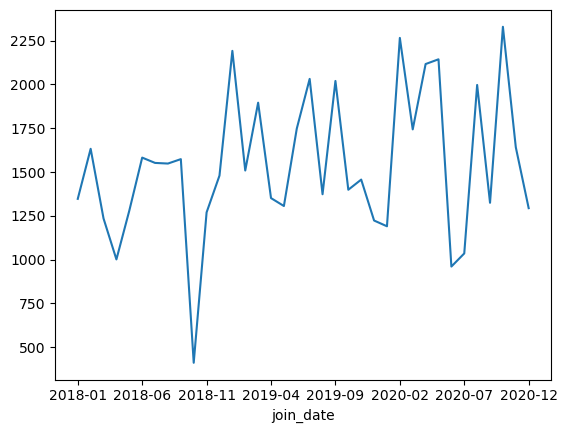

In [15]:
ltvv.mean().plot()

In [21]:
df = pd.DataFrame(cohorts_and_cx_ltv)
df

purchase_amount
join_date customer_id                 
2018-01   1069              663.704365
          1074             1401.102918
          1097              554.511156
          1101              248.733412
          1134              919.959702
...                                ...
2020-12   1118              339.485592
          1182              725.675323
          1219              941.489645
          1231             1953.916169
          1298             1840.162839

[300 rows x 1 columns]

In [25]:
max_ltv_customer_cohort = df.loc[df['purchase_amount'].idxmax()]
max_ltv_customer_cohort


purchase_amount    3639.674253
Name: (2019-03, 1025), dtype: float64

In [31]:
LTVprom=df["purchase_amount"].mean()
LTVprom

1560.4785237955402

In [32]:
CACprom=mkt_exp["marketing_expense"].mean()
CACprom

3271.323284439392

In [33]:
(df["purchase_amount"].sum()-mkt_exp["marketing_expense"].sum())/df["purchase_amount"].sum()

0.7484369133271318

In [34]:
(df["purchase_amount"].sum()-mkt_exp["marketing_expense"].sum())

350375.918898844

### Conclusión:
A la empresa le esta costando cada cliente en mayor proporcion a lo que legenera cada cliente en promedio, no obstante hay un margen positivo del 74% dado a que existen outliers como el caso del cliente 1025 que gasto 3639.674253 y se unio en 2019-03 por lo tanto a parte de analisis de mercado y buscar replicar la estrategia de dicho mes, la empresa necesita enfocarse en lo que le puede generar un cliente promedio.